In [1]:
%matplotlib inline

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import timeit
from skimage.io import imread

ImportError: cannot import name '_validate_lengths'

# Class Notes - Data Science Project Architecture
*Putting everything together: math, code,data, scientific approach*

#### Table of Contents
* High quality code and software engineering best practices
    * Code conventions
* Data science project structure
* Improving code
    * Debugging, unit tests, performance tests
* Reproducible research
    * Tools, methods, ideas

## High Quality Code
*Best practices, guides, patterns*


### Code Conventions
* Scientists usually don't care too much about code
* Leads to several things
    * Scientists' code is sometimes hard to understand and maintain
    * Developers can have a hard time debugging, and / or
communicating ideas
* Why not take the best of both worlds?
* Python guidelines ("The Zen of Python")
    * **import** this
* [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html)
* It’s good to have code conventions
    * Many people can write code as one
    * {Team / company > language > personal} conventions

In [3]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### General Ideas
* "It's not going to production anyway"
    * Often, **this is** your production code
* "Why did I write this?"
    * Leave comments, and make your code self documenting
        * Unit tests can also serve as documentation
        * Other assets (e.g., pdf documents, issues, project requirements, etc.) can also help on a higher level
* Use descriptive names
    * Add meaningful context
    * Avoid misleading names, comments, etc.
* Refactor the code when needed
    * Technical debt
* Separate the code into smaller, single-purpose chunks


## Naming Stuff
* lower_with_under - variables, functions, files, folders
* UPPER_WITH_UNDER - global constants
* PascalCase - class names, folders
* camelCase - **only** to conform to existing conventions
* Notes
    *  _ leading_underscore - marks a private variable
        * Not truly private, only a signal to developers not to mess with it
        * __double_leading_underscore –– “mangles” variable names
    * __ double_underscores __ - special variables or methods
        * "dunder" 
        * __ name __, __ doc __, __ init __, __ str  __, __ repr __, __ len __, etc.

In [4]:
arr = np.array([1 , 2 , 3])

In [5]:
arr.__str__()

'[1 2 3]'

In [6]:
arr.__repr__()

'array([1, 2, 3])'

In [7]:
arr.__len__()

3

In [8]:
def add_two_numbers(a, b):
    """
    Add two numbers,
    
    a = Integer, first parameter
    b = Integer, second parameter
    
    rReturns:
    The sum of a + b.
    """
    return a + b

In [9]:
num_1 = 5
num_2 = 7
add_two_numbers(num_1, num_2)

12

In [10]:
print(add_two_numbers.__doc__)


    Add two numbers,
    
    a = Integer, first parameter
    b = Integer, second parameter
    
    rReturns:
    The sum of a + b.
    


### Readability
* Use imports for modules and packages
* Avoid global variables
    * Pollute the global scope
    * Can create subtle dependencies in the code
    * Try using function parameters (and / or classes)
* List comprehensions, lambdas, conditional expressions
    * Okay for simple, one line cases
        - print([x + 3 for x in range(3)])
        - sum_two_nums = lambda x, y: x + y
        - print(("eve" if a % 2 == 0 else "odd")
    
    * Lexical scoping (closures) - **use** very carefully
        - def summator(a): # Usage: summator(4)(5)
             - def inner_summator(b):
                 - return a + b
            - return inner_summator       

In [11]:
print([x + 3 for x in range(3)])

[3, 4, 5]


In [12]:
sum_two_nums = lambda x, y: x + y

In [13]:
a = 45
print("eve" if a % 2 == 0 else "odd")

odd


In [14]:
# Lexical scooping
def summator(a): # Usage: summator(4)(5)
    def inner_summator(b):
        return a + b
    return inner_summator

### Readability (2)
* Whitespace
    * **DO NOT** mix tabs and spaces!
        - Prefer spaces (text editors replace 1 tab with 4 spaces by default)
        - This **can create** a lot of pain and **sinister bugs**
    * 1-2 blank lines between variables, functions and methods
    * Use typography rules (e.g. 1 space after comma)

* Comments 
    * Avoid inline comments
        - x = x + 1  # Increment x by 1
    * Docstrings a way of documenting the code, unique to Python
        - More info [here](https://peps.python.org/pep-0257/)
        - TODO comments: temporary code, short term solution, or good enough but not perfect

### Object Oriented Programming
* Python has OOP
* For most of our purposes, it's not necessary
    * We have used a lot of objects, but we didn't really need to create classes
* We generally prefer a combination of **procedural** and **functional** style
* If you're comfortable, feel free to use classes
    * All principles from other OOP languages apply
    * Once again, the goal is to create readable code, which is easier to maintain

## Project Structure
*How not to get lost*

### Notebook Structure
* Similar to scientific papers
* Imports usually the first cell contains all imports
* Title, author(s)
* Abstract - not mandatory, but really good to have
* Data manipulation process
    * Divided into sections and subsections
    * Most commonly: getting data, transformations, visualization, modelling, etc.
* Conclusion(s)
* Tips
    * Make sections self contained, reduce dependencies
    * Create functions when possible
        * To avoid creating too many global variables
        

### File Structure
* Usually, projects have one notebook
    * You may include many notebooks if you wish
    * You can also import code from notebooks
* Very long code can be separated in .py files
    * Not greatly recommended, but sometimes helps
        * E.g., if the file contains a lot of utility functions
* Using: simply import the files
    * Using the file names
    * You can also create folders and import them
        * These are called "modules"
    * We usually put all code in a separate folder, e.g., libs or utilities
* Data, images and other assets should also be in their own folders

## Improving Code
*How not to get your peers angry*
### Debugging
* Hardest way: don't debug at all 
* Easier: use print() statements at important places
* Best: use a debugger to trace the code execution
    * Every IDE (such as Visual Studio, VSCode, PyCharm, etc.) has one
* Most important concepts
    * Breakpoints
    * Step into, step over, step out
        * These usually have keyboard shortcuts assigned
    * Variable inspection
    * Interactive window; terminal
    * Call stack


### Unit Testing
* Debugging and testing are very scientific processes
    * Intuitive for most people with math / science background
* Can show bugs in the code
    * **Cannot show the code is bug free!**
    * "Absence of evidence is not evidence of absence"
* Unit tests: pieces of code that test other pieces of code
* Unit test layout: **AAA** (**A**rrange, **A**ct, **A**ssert)

In [15]:
def sum_numbers(a, b):
    return a + b


def test_sum_with_zeros():
    a = 0
    b = 0
    result = sum_numbers(a, b)
    assert result == 0

test_sum_with_zeros()

### Other Types of Tests
* Unit testing ensures our functions work
* There are many more types of tests
    * Software: integration tests, regression tests, system tests, security tests, etc.
    * Data validation tests - these ensure correct formats of the data
* Statistical tests
    * Is my hypothesis (or data model) true?
    * Example: for linear regression ⇒ $𝑅^2$
    * Another example: train / test set in machine learning
    * "Sanity checks"
    * Plotting graphs, comparisons, etc.
* It's absolutely important to check most (if not all) of our steps


### Performance Tests
* Test how fast a code executes
    * Better: test the code complexity with different arguments
        * Possibly, plot the results
* We can use the time library

In [24]:
random_numbers = np.random.normal(size=2000)

In [25]:
%%timeit
sum(random_numbers)

1.17 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
numbers_to_list = random_numbers.tolist()

In [27]:
%%timeit
sum(numbers_to_list)

15.6 µs ± 927 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


* Important: be careful how you check the time
    * Average execution over multiple trials to reduce random errors
    * Do not include initializations and "external" code
        * Code that you’re not interested in optimizing
* **Do not optimize prematurely!**

In [32]:
start = time.time()

numbers = [i for i in range(1000)]
sum_of_numbers = sum(numbers)

stop = time.time()
print(stop - start)

0.007996320724487305


### numpy Performance
* **numpy** is really fast on arrays and matrices
    * It works in C "behind the scenes"
    * Takes advantage of all elements being of the same type
* Vectorization - transforming the code so that it uses vectors and matrices
* If possible, use numpy only
    * Avoid conversion to and from lists or other structures this is slow

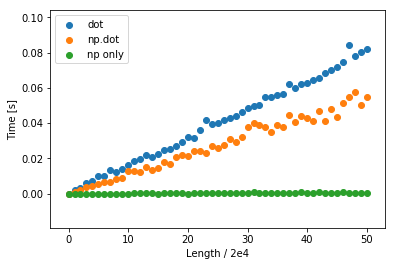

### numpy Performance (2)
* Example: grayscale image from RGB
    * 1140 x 550px
    * The second block is easier to write more intuitive, and 100x faster (0,05s vs 0,5s on my machine)
* Correctness test
    * (gs_img == np_img).all()

In [98]:
img = plt.imread("images/tiger.jpg")
img_as_list = img.tolist()
             
start = time.time()
gs_img = []
for row in range(len(img_as_list)):
    gs_img.append([])
    for col in range(len(img_as_list[row])):
        gs_img[row].append(0)
for row in range(len(img_as_list)):
    for col in range(len(img_as_list[row])):
        curr_sum = round(sum(img_as_list[row][col]) / 3)
        gs_img[row][col] = curr_sum
             
stop = time.time()             
print(stop - start)

1.364816427230835


In [101]:
start = time.time()
np_img = img.mean(axis = 2).round().astype("uint8")
stop = time.time()
print(stop - start)

0.15443038940429688


We can see that row cicles are cool, but in this case are too large and 10 times slower than numpy performance.

## Reproducible Research
*How to do stuff properly*

### Data Science Process
* As we know, the data science lifecycle is complex
    * For example, see this [image](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/media/lifecycle/tdsp-lifecycle2.png)
    * Also, there are [a lot of topics](https://medium.com/applied-data-science/every-arrow-on-this-diagram-is-a-data-science-project-775339e51828)
    
    
* Components and dependencies 
    * **Problem**(task)
    * **Data**(experiments, dataset; different forms)
    * **Algorithms**(e.g., linear regression, Bayesian model)
    * **Models**(testing, selecting, fine tuning; normalizing data, etc.)
    * **Programming**(APIs, functions, testing)
    * **Environment**(packages, such as numpy;or tools, such as Excel)
    * **Presentation**(tables, KPIs, visualizations,software)

### Reproducible Research
* The whole process is complex, so we need a way to verify our work (and possibly other people's work)
    * Particularly important when a study affects decisions
    * Sometimes impossible: time, opportunity, money, etc.
* Why is it so important?
    * It's **the only thing** we can guarantee about our study
* Easiest way: supply all your data, and your notebooks
    * The notebooks contain all information about your research
* Requirements: analytical (not raw) data; code; documentation of the code and processes
* Markdown and LaTeX help us write more explicit documentation (in text and math format)


* **Do**s
    * Good science (interesting, relevant problem; communication)
    * Automation of tasks (as much as possible)
    * Version control usage
        * Even if you’re working alone, this helps you in the case something goes terribly wrong
    * Environment management(e.g. conda packages)
    * Sometimes: random seed, mock objects and other pseudorandom variables

* **Don't**s
    * Manually edited data
        * If we get a new version, we have to edit the data again
    * Omitted (deleted) steps of the process
        * If a step you perform is not in your notebook, it can’t be replicated easily

### Comparing to Previous Work
* Both yours (if you have some) and others'
    * In the beginning: to see what others have done
    * In the end: to compare your findings to others'
* This can be a software product, or a paper, or something else
* Example: see papers at [arXiv](https://arxiv.org/)
Good examples of a scientific article layout
* Example 2: [Kaggle](https://www.kaggle.com/) notebooks (kernels)
* Don't forget to cite everyone that you've borrowed ideas, code, research methods, or information from
    * Reason 1: If they are proven wrong, your research may be wrong too
    * Reason 2: You're not plagiarizing them